<a href="https://colab.research.google.com/github/jemfr02/Final-Team9/blob/main/%ED%8C%8C%EC%9D%B4%EB%84%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%A0%84%EC%98%81%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#가설: 원작, 실화 기반 영화의 흥행력이 높을 것이다.

###'based on~'키워드 포함여부에 따른 카이제곱 검정 진행

is_based_on_original
0    6407
1    1836
Name: count, dtype: int64
--- 교차표 (빈도) ---
y_result                 0     1     2    3
is_based_on_original                       
0                     2295  1833  1574  705
1                      518   516   451  351

--- 교차표 (그룹 내 비율) ---
y_result                     0         1         2         3
is_based_on_original                                        
0                     0.358202  0.286093  0.245669  0.110036
1                     0.282135  0.281046  0.245643  0.191176


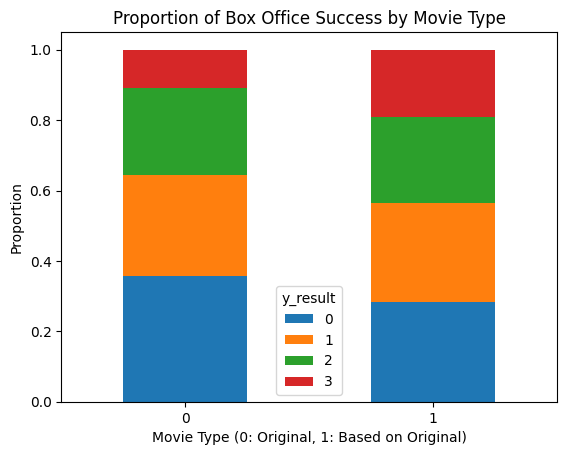

In [ ]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df = pd.read_csv('./TMDB_processed_final.csv')
keyword_columns = ['keywords']

# 'based on' 포함 여부를 나타내는 마스크 생성
mask = df[keyword_columns].astype(str).apply(lambda x: x.str.contains('based on', case=False, na=False)).any(axis=1)

# 'is_based_on_original' 열 추가
# 원작 기반이면 1, 아니면 0으로 구분합니다.
df['is_based_on_original'] = np.where(mask, 1, 0)

# 두 그룹의 영화 수 확인
print(df['is_based_on_original'].value_counts())

# 원작 기반 여부와 흥행 결과(y_result) 간의 교차표 생성
contingency_table = pd.crosstab(df['is_based_on_original'], df['y_result'])

print("--- 교차표 (빈도) ---")
print(contingency_table)

contingency_table_ratio = pd.crosstab(df['is_based_on_original'], df['y_result'], normalize='index')

print("\n--- 교차표 (그룹 내 비율) ---")
print(contingency_table_ratio)

# 시각화하여 확인
import matplotlib.pyplot as plt
import seaborn as sns

contingency_table_ratio.plot(kind='bar', stacked=True)
plt.title('Proportion of Box Office Success by Movie Type')
plt.xlabel('Movie Type (0: Original, 1: Based on Original)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='y_result')
plt.savefig('success_proportion_by_type.png')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# 2단계에서 만든 교차표를 카이제곱 검정에 사용
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2:.4f}")
print(f"P-value: {p_value}")

# p-value를 기준으로 가설을 판단합니다.
alpha = 0.05  # 유의수준 5%
if p_value < alpha:
    print(f"\nP-value ({p_value:.4f})가 유의수준 ({alpha})보다 작으므로, 귀무가설을 기각합니다.")
    print(">> 결론: 원작 기반 여부와 흥행 결과는 통계적으로 유의미한 관련이 있습니다.")
else:
    print(f"\nP-value ({p_value:.4f})가 유의수준 ({alpha})보다 크므로, 귀무가설을 기각할 수 없습니다.")
    print(">> 결론: 원작 기반 여부와 흥행 결과가 관련이 있다는 통계적 근거를 찾지 못했습니다.")

카이제곱 통계량: 97.6637
P-value: 4.940707731157782e-21

P-value (0.0000)가 유의수준 (0.05)보다 작으므로, 귀무가설을 기각합니다.
>> 결론: 원작 기반 여부와 흥행 결과는 통계적으로 유의미한 관련이 있습니다.
